# Nightlight Summary Statistics Model

## Imports

In [1]:
import os
import sys
sys.path.insert(0, '../utils')
import model_utils
import data_utils

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# !pip install google-cloud-storage
!source ../.env

In [3]:
import dotenv
dotenv.load_dotenv("../.env", override=True)
from google.cloud import storage
storage_client = storage.Client()


## File Locations

In [5]:
# Google Cloud Storage
bucket_name = 'tm-geospatial'
directory = 'poverty-prediction-datasets'

# Destination paths
ntl_summary_stats_file = '../data/nightlights_summary_stats.csv'
dhs_indicators_file = '../data/dhs_indicators.csv'

## Download Datasets

In [6]:
# Download from Google Cloud Storage
data_utils.download_from_bucket('nightlights_summary_stats.csv', directory, ntl_summary_stats_file, bucket_name);
data_utils.download_from_bucket('dhs_indicators.csv', directory, dhs_indicators_file, bucket_name);

Forbidden: 403 GET https://storage.googleapis.com/storage/v1/b/tm-geospatial?projection=noAcl&prettyPrint=false: storage@geo-ai-project.iam.gserviceaccount.com does not have storage.buckets.get access to the Google Cloud Storage bucket.

In [21]:
!wget https://raw.githubusercontent.com/thinkingmachines/ph-poverty-mapping/master/data/nightlights_summary_stats.csv

--2020-12-12 23:32:48--  https://raw.githubusercontent.com/thinkingmachines/ph-poverty-mapping/master/data/nightlights_summary_stats.csv
Resolving raw.githubusercontent.com... 151.101.112.133
Connecting to raw.githubusercontent.com|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135180 (132K) [text/plain]
Saving to: ‘nightlights_summary_stats.csv’

nightlights_summary 100%[===================>] 132.01K  --.-KB/s    in 0.04s   

2020-12-12 23:32:48 (3.08 MB/s) - ‘nightlights_summary_stats.csv’ saved [135180/135180]



## Load Datasets

In [7]:
# Load nighttime lights dataset
ntl_summary_stats = pd.read_csv(ntl_summary_stats_file, encoding="ISO-8859-1")
dhs_indicators = pd.read_csv(dhs_indicators_file)
dhs = ntl_summary_stats.merge(dhs_indicators, left_on='DHSCLUST', right_on='Cluster number')

# Define feature columns
feature_cols = ['cov', 'kurtosis', 'max', 'mean', 'median', 'min', 'skewness', 'std']

## Correlations

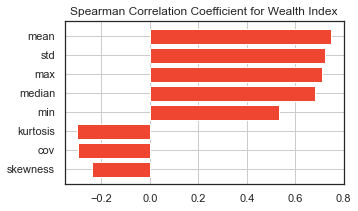

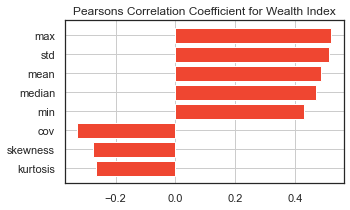

In [8]:
data_utils.plot_corr(
    data=dhs,
    features_cols=feature_cols,
    indicator = 'Wealth Index',
    figsize=(5,3)
)

## Machine Learning Pipeline

### Configuration

In [9]:
# Scoring metrics
scoring = {
    'r2': data_utils.pearsonr2,
    'rmse': data_utils.rmse
}

# Indicators of interest
indicators = [
    'Wealth Index',
    'Education completed (years)',
    'Access to electricity',
    'Access to water (minutes)'
]

In [11]:
import wandb
wandb.init(project="tm-poverty-prediction")

wandb: Currently logged in as: sabman (use `wandb login --relogin` to force relogin)


### Random Forest

Socioeconomic indicator: Wealth Index
fit_time : 214.5563
[241.34929419 241.83544397 241.66167402 241.5895412  106.34546423]
score_time : 0.9585
[1.02988482 0.94176936 1.04269505 1.14448786 0.63350296]
test_r2 : 0.5685
[0.51338014 0.61895978 0.58443989 0.58831283 0.5373186 ]
train_r2 : 0.6123
[0.62586941 0.60032462 0.60927551 0.60755304 0.61850017]
test_rmse : 46646.5581
[50367.8306407  45671.74350851 42798.88236895 46803.4479161
 47590.88592579]
train_rmse : 44211.1863
[43223.63103493 44484.73923896 45083.74047467 44225.61052696
 44038.21028981]


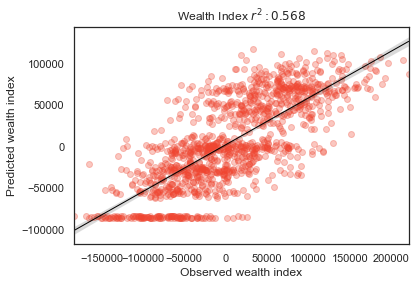

Best estimator: Pipeline(steps=[('regressor',
                 RandomForestRegressor(max_depth=4, max_features='log2',
                                       min_samples_leaf=7, min_samples_split=4,
                                       n_estimators=1682, n_jobs=-1,
                                       random_state=42))])
Socioeconomic indicator: Education completed (years)
fit_time : 231.4339
[257.25448012 257.93757796 263.40776396 258.45245218 120.11718082]
score_time : 0.6958
[0.4265449  0.53537488 1.25685906 0.43028188 0.82988906]
test_r2 : 0.3907
[0.35879131 0.3621454  0.38778237 0.46265388 0.38212439]
train_r2 : 0.4255
[0.43132316 0.4361191  0.42540735 0.40822239 0.42626626]
test_rmse : 1.9439
[1.95603067 2.20628219 1.86078204 1.81845973 1.87814004]
train_rmse : 1.8861
[1.88492376 1.81532245 1.90669685 1.91884745 1.9046348 ]


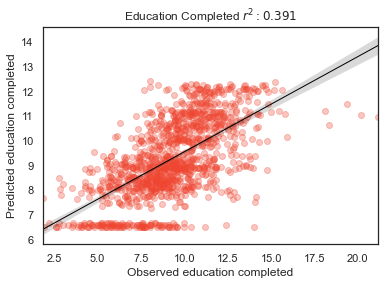

Best estimator: Pipeline(steps=[('regressor',
                 RandomForestRegressor(max_depth=3, max_features='log2',
                                       min_samples_leaf=3, min_samples_split=5,
                                       n_estimators=1790, n_jobs=-1,
                                       random_state=42))])
Socioeconomic indicator: Access to electricity
fit_time : 285.3114
[327.79242492 325.93189716 326.49504614 321.28700709 125.05058503]
score_time : 1.0070
[1.25413084 1.2547977  1.36482787 0.52950096 0.63169599]
test_r2 : 0.2921
[0.2610298  0.27327138 0.32843272 0.29190731 0.3057128 ]
train_r2 : 0.3239
[0.32182411 0.32143513 0.31867753 0.32382781 0.33364085]
test_rmse : 0.1223
[0.10207024 0.11869559 0.12687707 0.13864092 0.12540569]
train_rmse : 0.1195
[0.12516698 0.12102488 0.11802097 0.11569617 0.11768216]


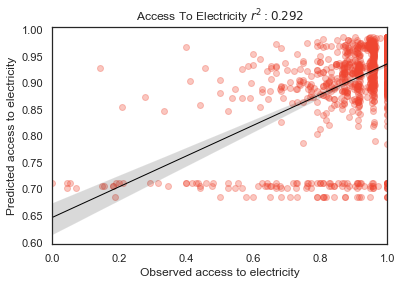

Best estimator: Pipeline(steps=[('regressor',
                 RandomForestRegressor(max_depth=6, min_samples_leaf=8,
                                       min_samples_split=6, n_estimators=1244,
                                       n_jobs=-1, random_state=42))])


ValueError: array must not contain infs or NaNs

In [12]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=feature_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=10,
    wandb=wandb
)

### XGBoost

In [27]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=feature_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='xgboost', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=10
)

TypeError: evaluate_model() missing 1 required positional argument: 'wandb'

### Lasso Regression

Socioeconomic indicator: Wealth Index
fit_time : 0.9091
[0.93470526 1.08434105 1.08536816 1.00931931 0.43180513]
train_rmse : 58931.7357
[58605.30126604 58879.74020149 59563.02554407 58505.17421725
 59105.43716706]
train_r2 : 0.3097
[0.31065152 0.2983289  0.31643954 0.31158217 0.31134271]
test_rmse : 59522.6414
[61341.91442325 59672.03977646 57002.79533742 61033.15065271
 58563.30665249]
score_time : 0.0020
[0.00177836 0.00235581 0.00225067 0.00192952 0.00171423]
test_r2 : 0.2988
[0.28366014 0.34585649 0.26527583 0.29617549 0.30286331]


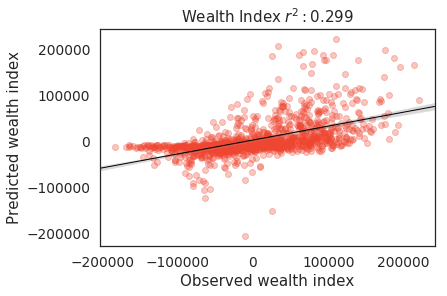

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=1.49816047538945, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False))])
Socioeconomic indicator: Education completed (years)
fit_time : 0.3194
[0.3164506  0.33293986 0.30984259 0.31052399 0.32726908]
train_rmse : 2.0533
[2.06495704 2.02005073 2.05598908 2.05236997 2.07297732]
train_r2 : 0.2370
[0.24020383 0.23806037 0.24140332 0.23198882 0.23311125]
test_rmse : 2.0571
[2.00070798 2.18351957 2.03748389 2.09920286 1.96447585]
score_time : 0.0017
[0.00210571 0.00181961 0.00171351 0.00165129 0.0012486 ]
test_r2 : 0.2345
[0.22167187 0.22746105 0.215277   0.25319531 0.25476984]


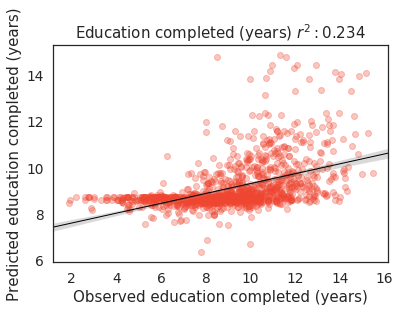

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=1.49816047538945, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False))])
Socioeconomic indicator: Access to electricity
fit_time : 0.3609
[0.31382775 0.43479133 0.41256952 0.32188416 0.32166696]
train_rmse : 0.1453
[0.15194288 0.14685047 0.14291499 0.14061807 0.14403255]
train_r2 : nan
[1.03298421e-33            nan            nan            nan
 7.90490625e-33]
test_rmse : 0.1447
[0.11575033 0.13925026 0.15474553 0.16312283 0.15052919]
score_time : 0.0017
[0.00218678 0.00146103 0.00180221 0.00170946 0.0013268 ]
test_r2 : nan
[2.02760870e-31 2.63041063e-31            nan            nan
 1.05782576e-31]


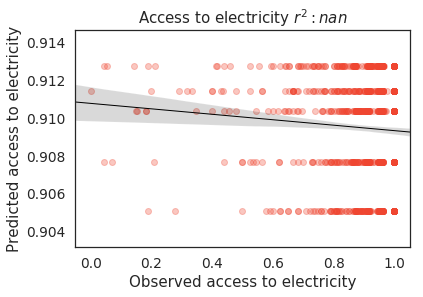

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=1.49816047538945, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False))])
Socioeconomic indicator: Access to water (minutes)
fit_time : 0.3367
[0.31207561 0.30880904 0.41008878 0.33604407 0.31624389]
train_rmse : 8.1018
[6.40582874 8.12836855 8.48800305 8.77278344 8.71386315]
train_r2 : 0.0141
[0.01688645 0.01456267 0.01369873 0.01317846 0.01240355]
test_rmse : 7.6162
[12.97270824  8.23066431  6.6381061   4.91712191  5.32241207]
score_time : 0.0017
[0.00208354 0.00192022 0.0016346  0.00129104 0.0014236 ]
test_r2 : 0.0173
[0.01275113 0.01049172 0.01396336 0.02251026 0.02662994]


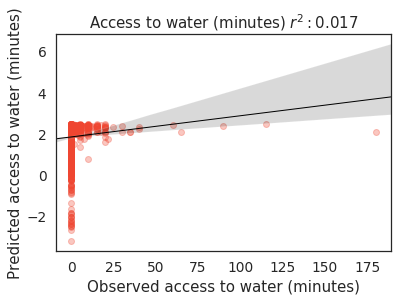

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])


In [8]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=feature_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='lasso', 
    refit='r2', 
    search_type='grid', 
    n_splits=5
)

### Ridge Regression

Socioeconomic indicator: Wealth Index
fit_time : 0.5784
[0.61164856 0.65713358 0.70978165 0.60197544 0.31146026]
train_rmse : 58890.5972
[58526.03351829 58875.58710743 59512.93369943 58437.3579941
 59101.07378452]
train_r2 : 0.3106
[0.31250028 0.29842764 0.31757933 0.3131606  0.31144355]
test_rmse : 59484.3481
[60974.85714551 59642.14960594 56973.0716131  61242.56101706
 58589.10109982]
score_time : 0.0017
[0.00194693 0.0015173  0.00161695 0.00183773 0.00142717]
test_r2 : 0.3000
[0.29232286 0.34671091 0.26584429 0.29248766 0.30240878]


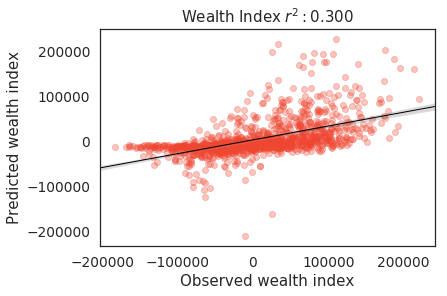

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])
Socioeconomic indicator: Education completed (years)
fit_time : 0.3226
[0.36839867 0.30900884 0.31012273 0.31274056 0.31282854]
train_rmse : 2.0240
[2.04228231 1.99025689 2.02666174 2.01762914 2.04300165]
train_r2 : 0.2562
[0.25569887 0.25922846 0.26181079 0.25031803 0.25398055]
test_rmse : 2.0385
[1.9682329  2.17273357 2.02645663 2.062654   1.96258109]
score_time : 0.0025
[0.00204802 0.001544   0.00595617 0.00139141 0.00140357]
test_r2 : 0.2461
[0.246128   0.23383306 0.22188045 0.26953804 0.25915972]


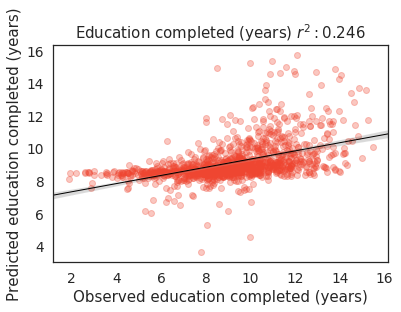

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])
Socioeconomic indicator: Access to electricity
fit_time : 0.3115
[0.3091054  0.3182528  0.30917811 0.31046581 0.31057954]
train_rmse : 0.1370
[0.14295274 0.13841536 0.13468557 0.13260021 0.13656377]
train_r2 : 0.1100
[0.11483524 0.1115829  0.11185125 0.11078834 0.10102234]
test_rmse : 0.1374
[0.11226983 0.13248824 0.14752428 0.1546364  0.14013851]
score_time : 0.0015
[0.00132227 0.00217605 0.00125957 0.00156689 0.00128007]
test_r2 : 0.1011
[0.0827443  0.09329384 0.09022268 0.10186028 0.13756925]


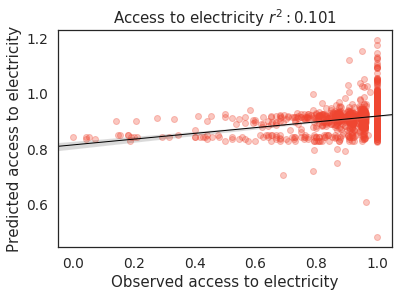

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])
Socioeconomic indicator: Access to water (minutes)
fit_time : 0.3162
[0.30863261 0.31107688 0.32851815 0.32301092 0.30961752]
train_rmse : 8.0587
[6.38192174 8.09348962 8.42392294 8.71717228 8.6769911 ]
train_r2 : 0.0240
[0.02336213 0.02288637 0.02806719 0.02517608 0.02026343]
test_rmse : 7.6264
[12.91201845  8.19138148  6.75524169  5.01222448  5.26093279]
score_time : 0.0018
[0.00220847 0.00145006 0.00230503 0.00188017 0.00120258]
test_r2 : 0.0233
[0.02649733 0.02005884 0.00532275 0.01495884 0.04970098]


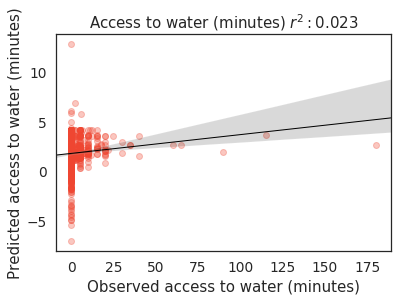

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=1.49816047538945, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001))])


In [9]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=feature_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='ridge', 
    refit='r2', 
    search_type='grid', 
    n_splits=5
)